In [17]:
# # Warnings configuration
# import warnings
# warnings.filterwarnings('ignore')

# # General Libraries
# import tensorflow as tf
# import numpy as np

# # Neural Network Components
# from tensorflow import keras
# from keras import layers
# from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras import regularizers
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping
# from keras import backend as K

In [18]:
transfered_weights_model = keras.models.load_model('my_model3.keras')
fine_tuned_model = keras.models.load_model('my_model4.keras')

In [19]:
h = 109
w = 109
image_size = (h, w,3)
batch_size = 32
data_dir = '/tf/keras_neural_network/Mis_Tests/Faces' 
other_test_dir = '/tf/keras_neural_network/Mis_Tests/img_align_celeba'
new_data_dir = '/tf/keras_neural_network/Mis_Tests/New_Faces'

new_ds = tf.keras.utils.image_dataset_from_directory(
    new_data_dir,
    labels=None,
    image_size=image_size[:2],
    interpolation='bilinear',
    batch_size=batch_size,
    
)

other_ds = tf.keras.utils.image_dataset_from_directory(
    other_test_dir,
    labels=None,
    image_size=image_size[:2],
    interpolation='bilinear',
    batch_size=batch_size,
    subset='validation',
    validation_split=0.0002,
    shuffle=True,
    seed=42,
    
)

Found 14 files belonging to 1 classes.
Found 202599 files belonging to 1 classes.
Using 40 files for validation.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    labels='inferred',
    label_mode='categorical', 
    image_size=image_size[:2],
    interpolation='bilinear',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    
)

Found 9711 files belonging to 2 classes.
Using 1942 files for validation.


In [36]:
ds = [new_ds, other_ds]
ds = ds[0]

In [37]:
tw_eval = transfered_weights_model.evaluate(val_ds, verbose=0)
tw_predict = transfered_weights_model.predict(ds, verbose=0)
print(tw_eval)
print(np.argmax(tw_predict, axis=1))

[0.2166919857263565, 0.9732235074043274]
[1 0 0 1 1 1 1 1 1 0 1 0 1 0]


1/1 [==============================] - 0s 32ms/step


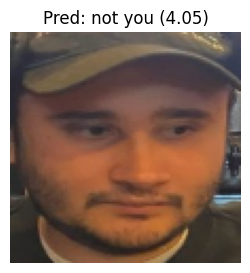

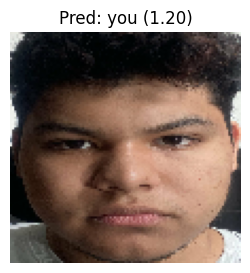

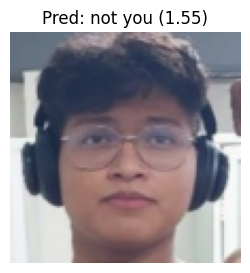

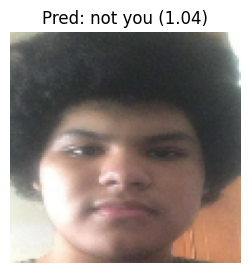

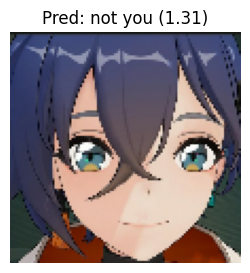

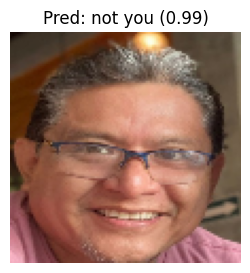

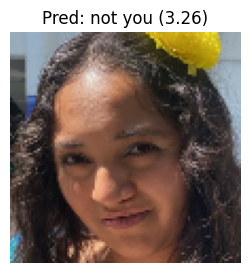

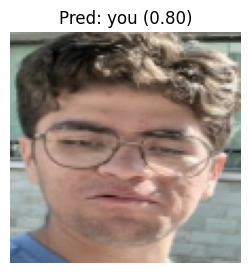

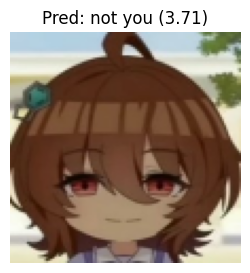

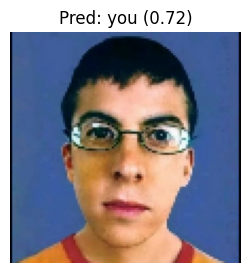

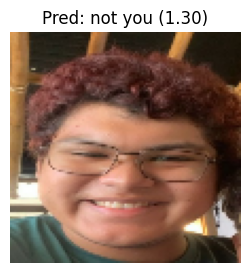

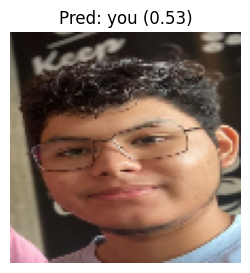

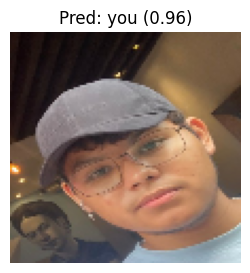

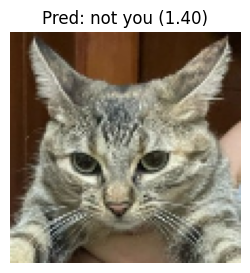

In [38]:
import matplotlib.pyplot as plt
import numpy as np


class_names = ["you", "not you"] 

preds = transfered_weights_model.predict(ds)

idx = 0 

for batch in ds:
    for img in batch:
        prediction = preds[idx]
        pred_class = np.argmax(prediction)
        confidence = np.max(prediction)

        plt.figure(figsize=(3,3))
        plt.imshow(img.numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[pred_class]} ({confidence:.2f})")
        plt.axis("off")
        plt.show()

        idx += 1

In [39]:
ft_eval = fine_tuned_model.evaluate(val_ds, verbose=0)
ft_predict = fine_tuned_model.predict(ds, verbose=0)
print(ft_eval)
print(np.argmax(ft_predict, axis=1))

[0.10418029129505157, 0.9961379766464233]
[1 1 0 0 0 1 0 1 1 1 1 1 0 1]


1/1 [==============================] - 0s 32ms/step


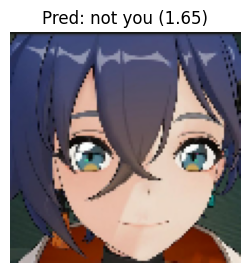

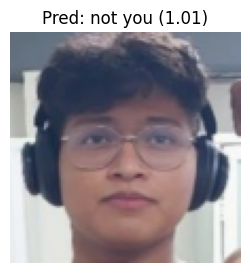

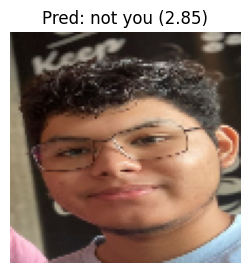

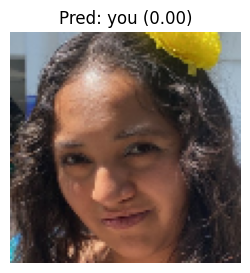

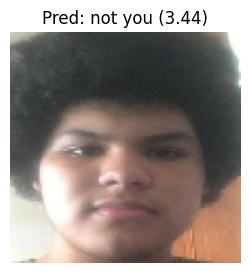

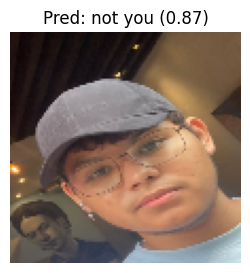

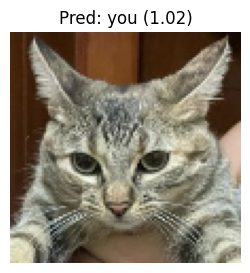

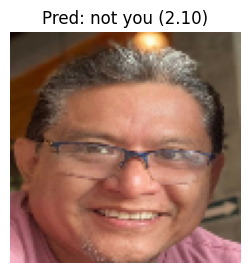

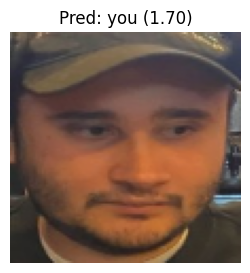

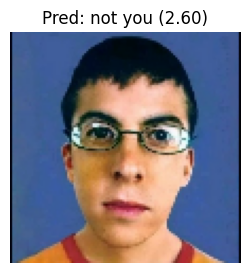

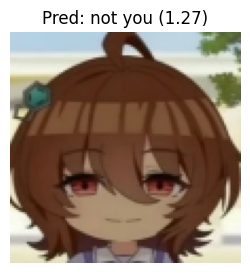

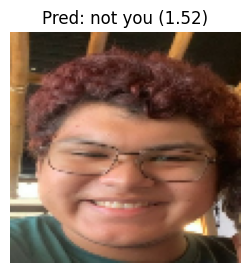

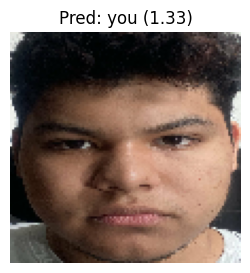

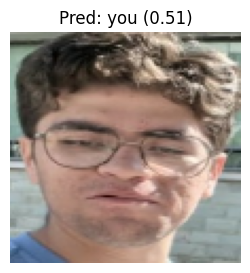

In [40]:
class_names = ["you", "not you"]

preds = fine_tuned_model.predict(ds)

idx = 0 

for batch in ds:
    for img in batch:
        prediction = preds[idx]
        pred_class = np.argmax(prediction)
        confidence = np.max(prediction)

        plt.figure(figsize=(3,3))
        plt.imshow(img.numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[pred_class]} ({confidence:.2f})")
        plt.axis("off")
        plt.show()

        idx += 1